# 🔵 Generating Data

In [81]:
import numpy as np
import matplotlib.pyplot as plt

The original equation is
$$y = 4 + 3x + \text{Gaussian Noise}$$

In [82]:
X = 2 * np.random.rand(100, 1)   # Distribuiçâo uniform com vetor 100x1
y = 4 + 3 * X + np.random.randn(100, 1)  # Distribuição Normal com vetor 100x1

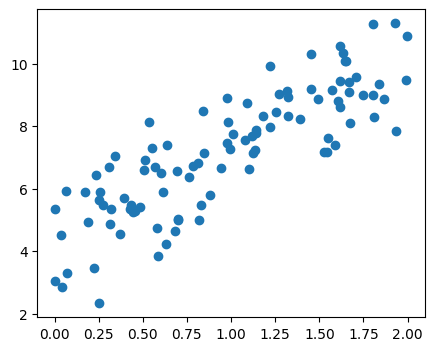

In [83]:
# Data
plt.figure(figsize=(5,4))
plt.scatter(X, y)
plt.show()

# 🔵 Computing The Normal Equation

We must add a column of ones to the data to account for the bias term.

In [84]:
X_b = np.c_[np.ones((100, 1)), X]

In [85]:
theta_best = np.linalg.inv( X_b.T.dot(X_b) ).dot( X_b.T.dot(y) )
theta_best

array([[4.32496596],
       [2.94144238]])

## 🔷 Predictions 

In [86]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_pred = X_new_b.dot(theta_best)
y_pred

array([[ 4.32496596],
       [10.20785073]])

## Plotting

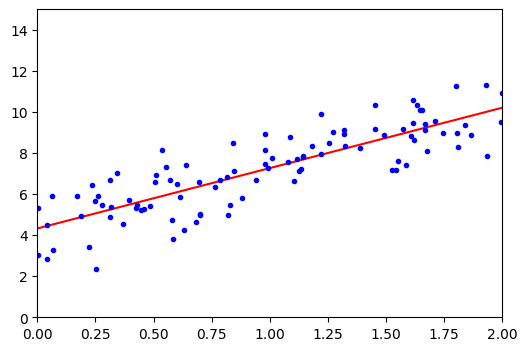

In [87]:
plt.figure(figsize=(6, 4))
plt.plot(X_new, y_pred, "r-")
plt.plot(X, y, "b.")
plt.axis([0, 2, 0, 15])
plt.show()

# 🔵 Gradient Descent

In [88]:
eta = 0.1   # step length
max_iter = 1000
m = X.shape[0]
tol = 1e-10

theta = np.random.randn(2, 1)   # random initialization
display(theta)

for i in range(max_iter):
    gradient = 2/m* X_b.T.dot( X_b.dot(theta) - y )
    theta = theta - eta*gradient
    
    # The norm of the gradient vector can be used as a stopping condition for the algorithm
    if np.linalg.norm(gradient) <= tol:
        print(f"Number of iterations: {i}")
        break

array([[-2.14270873],
       [-0.3435243 ]])

Number of iterations: 737


In [89]:
theta

array([[4.32496596],
       [2.94144238]])

# 🔵 Stochastic Gradient Descent

In [97]:
n_epochs = 50
t0, t1 = 5, 50
tol = 1e-10

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)  # Random initialization

for epoch in range(n_epochs):  # This actually counts as the iteration
    for i in range(m):  # This is equivalent to the matrix operation on the whole dataset
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]  # use from:to to get an array instead of element.
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta * gradients       

In [98]:
theta

array([[4.26207378],
       [3.00783328]])